In [1]:
%matplotlib inline
%load_ext memory_profiler 

In [2]:
from KnackpackData import n_items,weights,values,max_weight,max_value,encodeNumber,items_size_threshold,getDiff
from Timer import *
import matplotlib.pyplot as plt
import numpy as np
import random
from numba import njit,prange
t = Timer()

## Udział procentowy przedmiotów w plecaku

Implementacja ma pokazać procentowy udział małych (i dużych) przedmiotów wybranych do wypełnienia plecaka, wśród najlepszych wyników.

Mały przedmiot ma wagę mniejszą bądź równą 0.5. <br>
Duże przedmioty to te z wagą powyżej 0.5.

### Obliczenia

Zliczana jest ilość użytych małych i dużych przedmiotów w każdym znalezionym rozwiązaniu.

Wybierany jest 1% najlepszych rozwiązań i wyświetlany jest wykres zawierający procentowe udziały małych przedmiotów wśród wszystkich użytych przedmiotów w konkretnym plecaku.

In [3]:
def scoreFunctionWithItemsSizes(mask, weights=weights,values=values,max_weight=max_weight,max_value=max_value):
    final_weight = 0
    score = 0 
    items = weights[mask]
    s_items = items[items <= items_size_threshold].size
    b_items = items[items > items_size_threshold].size
    for i in prange(weights.size):
        if mask[i]:
            final_weight+=weights[i]
            score+=values[i]
    return final_weight, score, s_items, b_items

def getDataWithItemsSize():
    return np.array([scoreFunctionWithItemsSizes(encodeNumber(x)) for x in prange(2**n_items)])

data_with_sizes_t = getDataWithItemsSize()

In [4]:
# Sort by weights
data_with_sizes = data_with_sizes_t[np.argsort(data_with_sizes_t[:, 0])]
# Delete results larger than max_weight
data_with_sizes = data_with_sizes[(data_with_sizes[:,0] <= max_weight)]
# Sort by score
data_with_sizes = data_with_sizes[np.argsort(data_with_sizes[:, 1])]

In [5]:
data_with_sizes[-10:,0:2]

array([[2.65571179, 4.69313976],
       [2.6979442 , 4.70059162],
       [2.88330288, 4.74501949],
       [2.96497628, 4.74671992],
       [2.95226796, 4.76879224],
       [2.78004393, 4.81811392],
       [2.87913456, 4.8687458 ],
       [2.77098602, 4.87170844],
       [2.99857711, 4.92358817],
       [2.89531816, 4.9966826 ]])

In [6]:
# Number of best 1% results
data_size = data_with_sizes.shape[0]
best_1_cnt = int(np.round(data_size/100))

In [7]:
# Flip results (start from the best result)
best_1_ar = np.flip(data_with_sizes[-best_1_cnt:], axis=0)
# Prepare small items percentages
small_items_p = best_1_ar[:,2]/(best_1_ar[:,2]+best_1_ar[:,3])

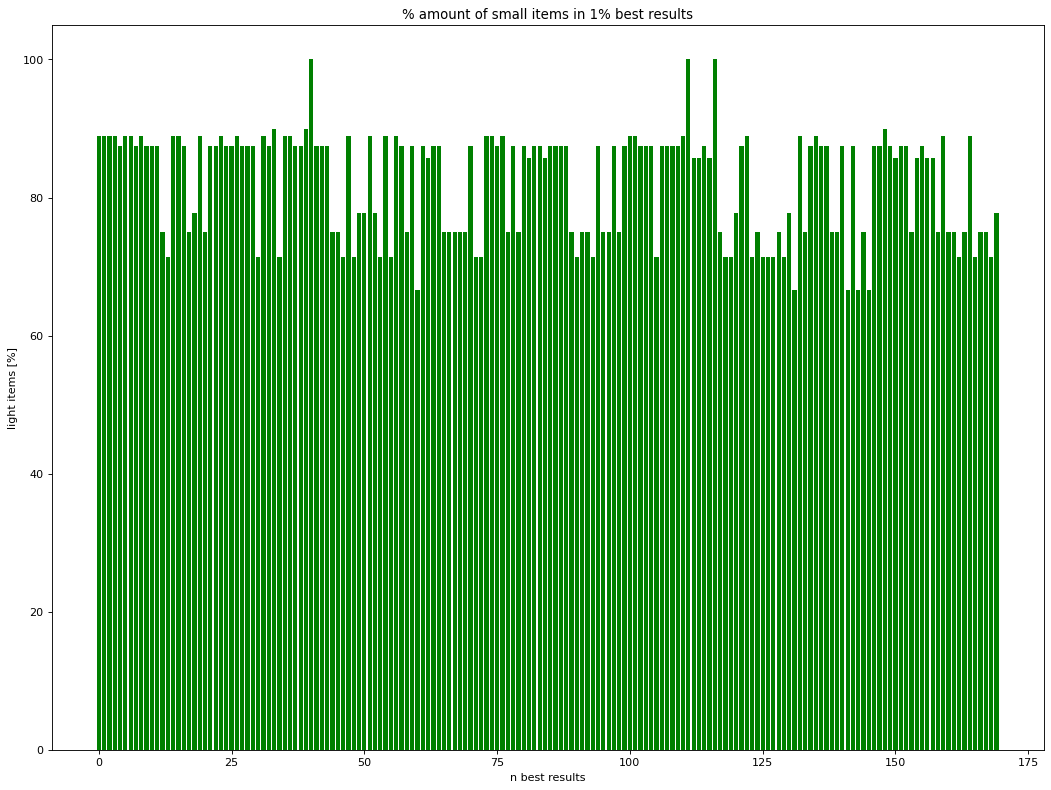

In [8]:
# Plot results
plt.figure(figsize=(16, 12), dpi=80) 
plt.bar(np.arange(best_1_cnt), small_items_p*100, color="g")
plt.ylabel('light items [%]')
plt.xlabel('n best results')
plt.title('% amount of small items in 1% best results')
plt.show()

### Wnioski

Z powyższych danych wynika, że lepszym rozwiazaniem jest dobieranie małych przedmiotów do plecaków. Większość (ponad 60-80% wyników) przedmiotów w najlepszych plecakach to przedmioty małe.